# Decision making in business

**Project Description**

Client - a large online store.

Goal - to analyze the list of hypotheses prepared by me and the marketing department, and select those that will increase the revenue of the online store.

Tasks:
- prioritize hypotheses
- launch A/B test
- analyze the results
- Data Description

**Part 1 (Hypotheses)**

- Hypothesis - a brief description of the hypothesis;
- Reach - user coverage on a 10-point scale;
- Impact - impact on users on a 10-point scale;
- Confidence - confidence in the hypothesis on a 10-point scale;
- Efforts - resource costs for testing the hypothesis on a 10-point scale. The higher the Efforts value, the more expensive the hypothesis testing.

**Part 2**

Dataset with orders:
- transactionId - order ID;
- visitorId - ID of the user who made the order;
- date - date when the order was placed;
- revenue - revenue of the order;
- group - A/B test group to which the order belongs.

Dataset with visitors:
- date - date;
- group - A/B test group;
- visitors - number of users on the specified date in the specified A/B test group.

## Hypothesis prioritization

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

Let's look at the dataset with hypotheses, according to preliminary data there are 9 of them.

In [2]:
#изучим датасет

hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')

#сбросим ограничения на вывод табличных данных
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


So, we have a dataset with 9 hypotheses and all the necessary indicators to select the most significant and urgent ones.

In [3]:
# применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE']=(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'])
display(round(hypothesis[['Hypothesis','ICE']], 2).sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


After applying the ICE framework, we can immediately highlight 3 hypotheses that need to be tested first. They are indexed 8, 0, and 7. But for complete reliability, we will also use the RICE framework.

In [4]:
# применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
display(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Now the ranking of "leader" hypotheses has slightly changed. The most points belong to hypothesis 7. Hypothesis 2, which was not present after the first calculation, also made it to the top. And hypotheses 0 and 6 shared the 3rd and 4th places.

The ranking changed after applying the RICE framework. This is because RICE also takes into account the Reach indicator, which means coverage, and for the RICE method, it is one of the most significant indicators. Hypothesis 7 has a Reach score of 10, which is the maximum score. And thanks to this indicator, hypothesis 6 also made it to the ranking.

## A/B Test Analysis

Let's analyze the A/B test according to this plan:

1. Build a graph of cumulative revenue by groups. Draw conclusions and make assumptions.
2. Build a graph of cumulative average order value (AOV) by groups. Draw conclusions and make assumptions.
3. Build a graph of the relative change in cumulative AOV of group B to group A. Draw conclusions and make assumptions.
4. Build a graph of cumulative average number of orders per visitor by groups. Draw conclusions and make assumptions.
5. Build a graph of the relative change in cumulative average number of orders per visitor of group B to group A. Draw conclusions and make assumptions.
6. Build a scatter plot of the number of orders per user. Draw conclusions and make assumptions.
7. Build the 95th and 99th percentiles of the number of orders per user. Choose a boundary to define abnormal users.
8. Build a scatter plot of order values. Draw conclusions and make assumptions.
9. Build the 95th and 99th percentiles of order values. Choose a boundary to define abnormal orders.
10. Calculate the statistical significance of differences in the average number of orders per visitor between groups using "raw" data. Draw conclusions and make assumptions.
11. Calculate the statistical significance of differences in the average order value between groups using "raw" data. Draw conclusions and make assumptions.
12. Calculate the statistical significance of differences in the average number of orders per visitor between groups using "cleaned" data. Draw conclusions and make assumptions.
13. Calculate the statistical significance of differences in the average order value between groups using "cleaned" data. Draw conclusions and make assumptions.
14. Make a decision based on the test results and explain it. Possible decisions include:
- Stop the test and declare a victory for one of the groups.
- Stop the test and declare no differences between the groups.
- Continue the test.


### Data Preprocessing

In [5]:
#изучим остальные датасеты
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

display(orders.head(10))
display(visitors.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [6]:
#изучим всю информацию по датасетам и типам данных
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [7]:
#переименуем названия столбцов, где необходимо
orders.rename(columns = {'transactionId':'transaction_id', 
                         'visitorId':'visitor_id'}, 
              inplace = True )

In [8]:
# проверим есть ли явные дубликаты объявлений
orders.duplicated().sum()

0

In [9]:
# проверим есть ли явные дубликаты объявлений
visitors.duplicated().sum()

0

There are no obvious duplicates.

In [10]:
#изменим тип данных в столбцах date на datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Let's see how many unique users are in the datasets. 

In [11]:
orders['visitor_id'].nunique()

1031

There are 1031 unique users in total, but there are 1197 users in the dataset. This means there is an overlap of users in groups A and B.

In my opinion, this can distort the data. However, it is not advisable to delete them. If we delete such users from one group, the conversion rate will increase in one group, but remain the same in the other, leading to distorted results in one group. If we delete them from both groups, the conversion rate will be distorted in both groups. Therefore, the right decision is to leave them as they are.

After we changed the data type in the date column, made the column names look neat, and checked for duplicates and missing values, we can say that the data is in good shape and we can move on.

### Graph of Cumulative Revenue by Groups

Let's build a graph of cumulative revenue by groups. Draw conclusions and make assumptions.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#подсчитаем сумму средних чеков
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}),axis=1).sort_values(by=['date','group'])

#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединим обе таблицы в одну с понятными названиями столбцов
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Let's build graphs of cumulative revenue by day and by groups in the A/B test:

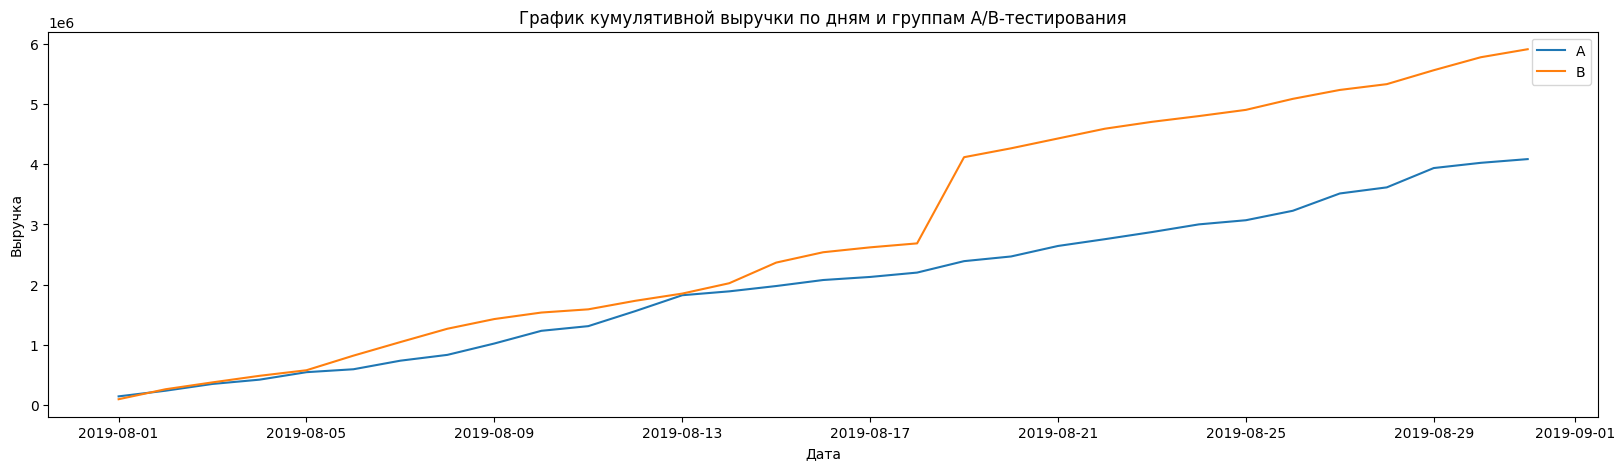

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#определим размеры графика
plt.figure(figsize=(20,5))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')

plt.legend();


The revenue has been steadily increasing over time in both groups, but group B's revenue is significantly higher than group A's. This indicates that the test may be successful, but we need to dig deeper to draw definitive conclusions.

### Cumulative average check graph by groups

Let's build a graph of the cumulative average check by groups. Let's draw conclusions and make assumptions.

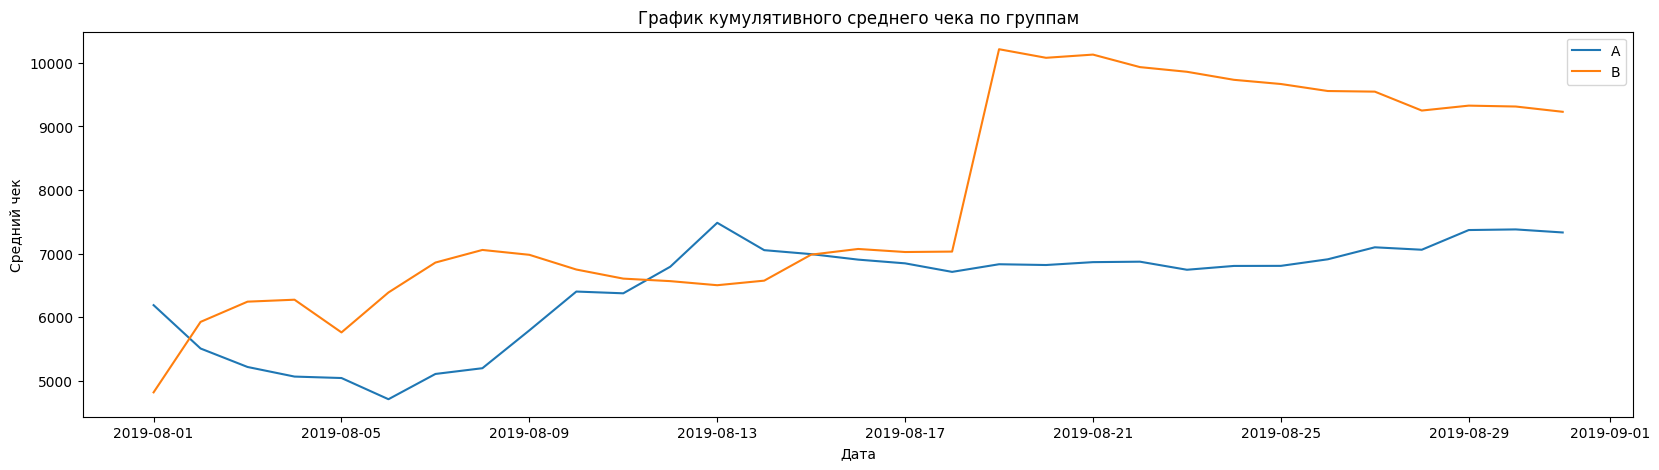

In [14]:
#определим размеры графика
plt.figure(figsize=(20,5))

# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

There is also a noticeable outlier on the check graph, possibly a very expensive order. The A test graph is more stable, although it grows slower. Even at the end of the test, the average check of the two groups differs significantly, but it is higher for B.

### Relative change graph of cumulative average check of group B to group A

Let's build a graph of the relative change in the cumulative average check of group B to group A. Let's draw conclusions and make assumptions.

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

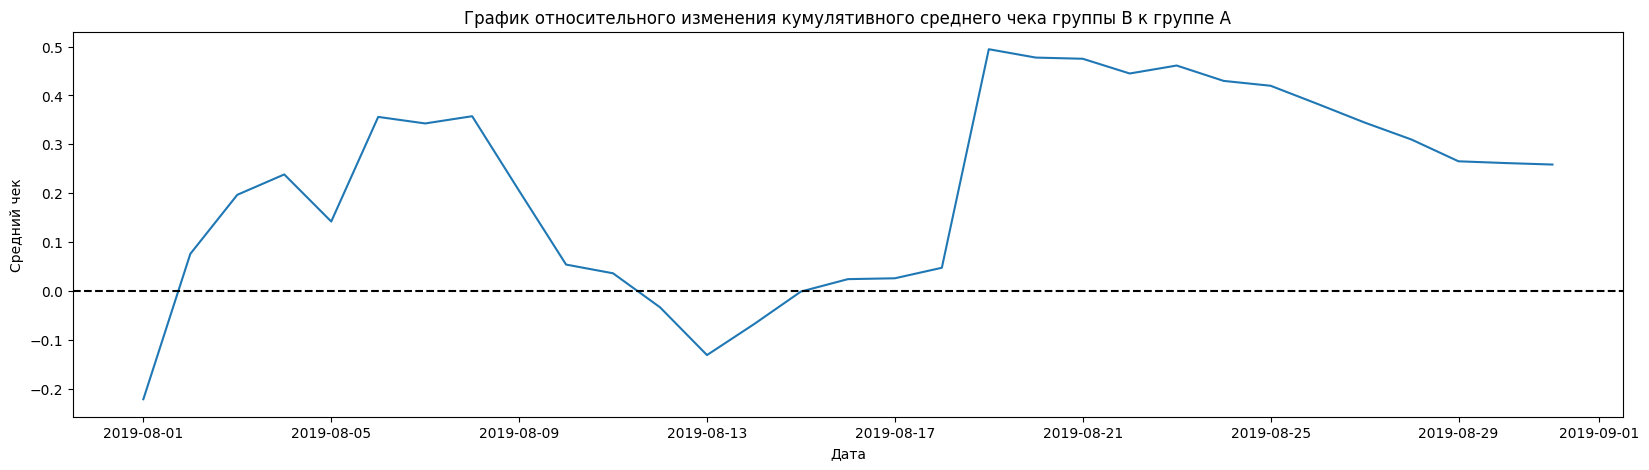

In [15]:
#определим размеры графика
plt.figure(figsize=(20,5))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')


In several points, the graph "jumps", which means that there were large orders on some days.

### Relative change graph of cumulative average number of orders per visitor of group B to group A

Let's build a graph of the relative change in the cumulative average number of orders per visitor of group B to group A. Let's draw conclusions and make assumptions.

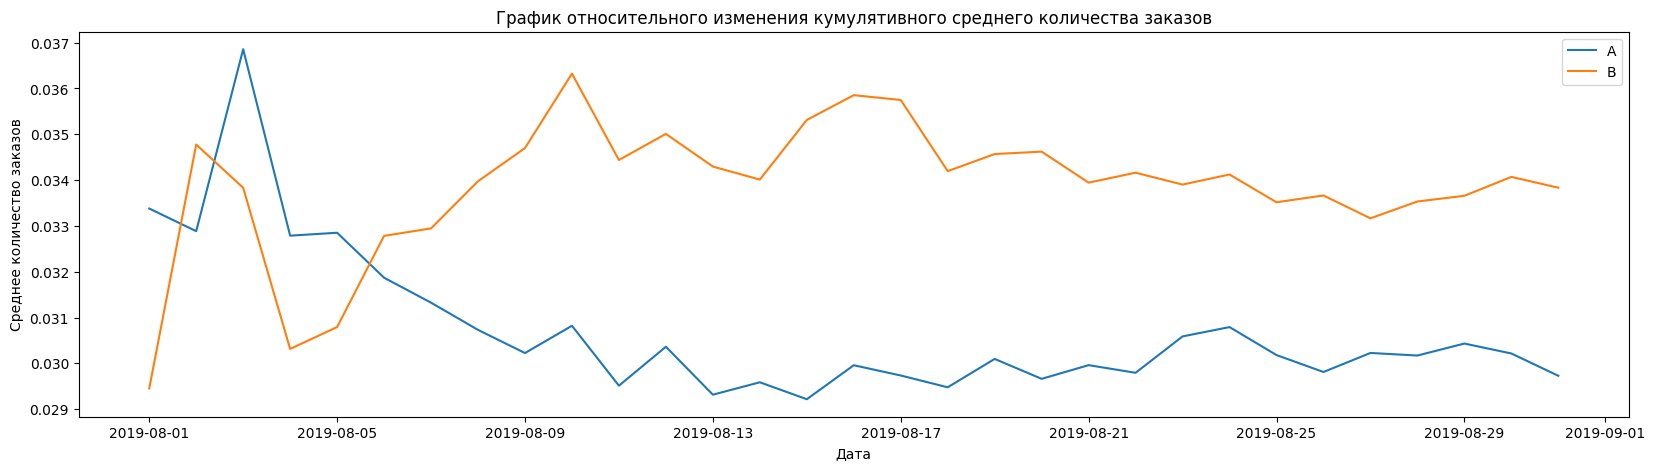

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#определим размеры графика
plt.figure(figsize=(20,5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов')

plt.legend();


The graph turned out to be symmetrical. At the beginning, both groups fluctuated, and then the conversion of group B surged ahead and stabilized, while the conversion of group A dropped and also stabilized.

### Relative difference graph of cumulative conversions

Let's build a graph of the relative change in the cumulative average number of orders per visitor of group B to group A. Let's draw conclusions and make assumptions.

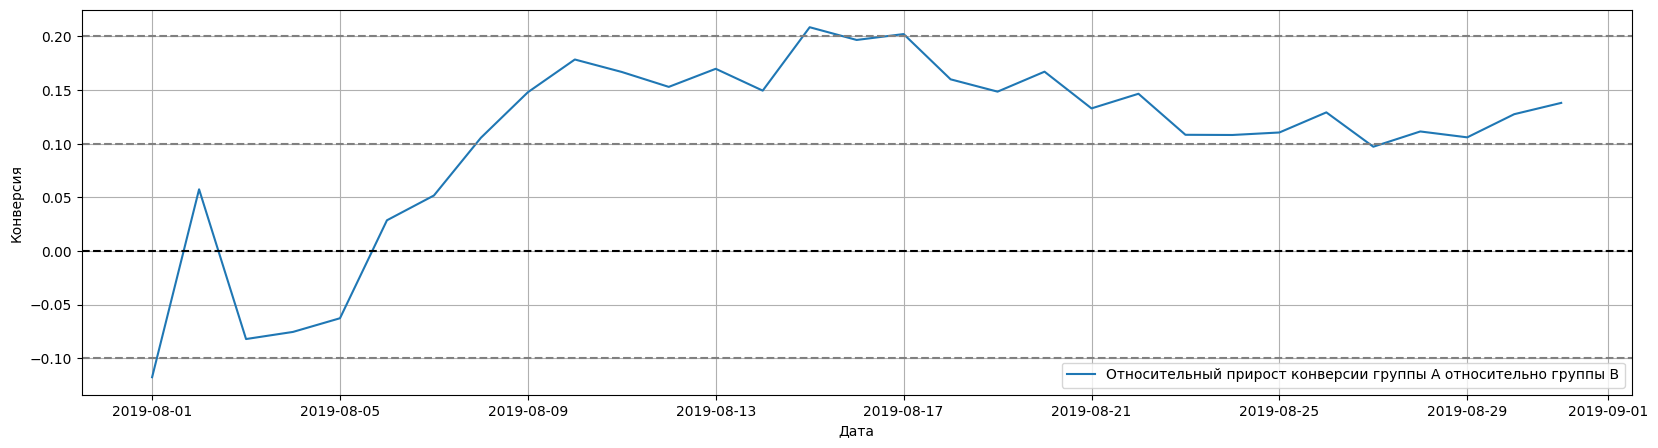

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='inner', suffixes=['A', 'B'])

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы А относительно группы В")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Конверсия');



At the beginning of the test, group A significantly lagged behind group B, then surged ahead, but the values are still unstable. It is currently not possible to draw any conclusions about the test. It is necessary to analyze the anomalies.

### Scatter plot of the number of orders per user

Let's build a scatter plot of the number of orders per user. Let's draw conclusions and make assumptions.

Let's count the number of orders per user and look at the results:

In [18]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


There are users who made 11, 9, 8, and 5 orders. This is significantly more than an average user in a week. Let's build a histogram of the distribution of the number of orders per user.

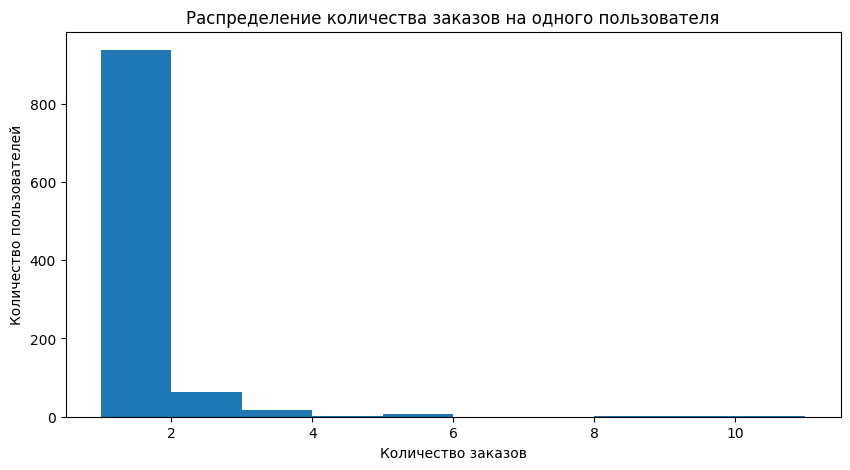

In [19]:
plt.figure(figsize=(10,5))
plt.hist(ordersByUsers['orders']);
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Распределение количества заказов на одного пользователя');


Most customers only ordered once. However, the proportion of users with 2-3 orders is also notable.

Let's build a scatter plot of the number of orders per user:

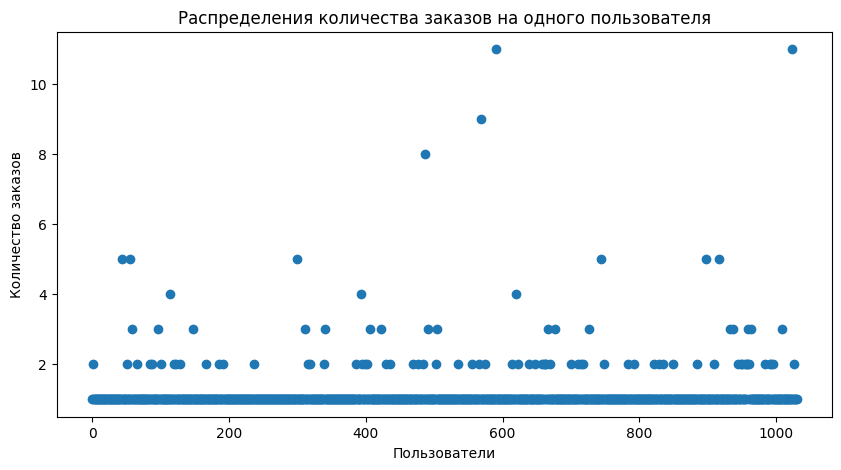

In [20]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,5))

plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('Распределения количества заказов на одного пользователя');

The conclusions are confirmed: there are many users with 2-3 orders. It is currently unclear whether to consider them anomalies or not.

### 95th and 99th percentiles of the number of orders per user

Let's plot the 95th and 99th percentiles of the number of orders per user. We will choose a threshold to identify anomalous users.

In [21]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])


No more than 5% of users placed more than 2 orders, and 10% of users ordered more than once. It is reasonable to choose 2 orders per user as the upper limit of the number of orders and filter out anomalous users based on it.

### Scatter plot of order prices

Let's create a scatter plot of order prices and draw conclusions and make assumptions.

Let's study the histogram of order prices:

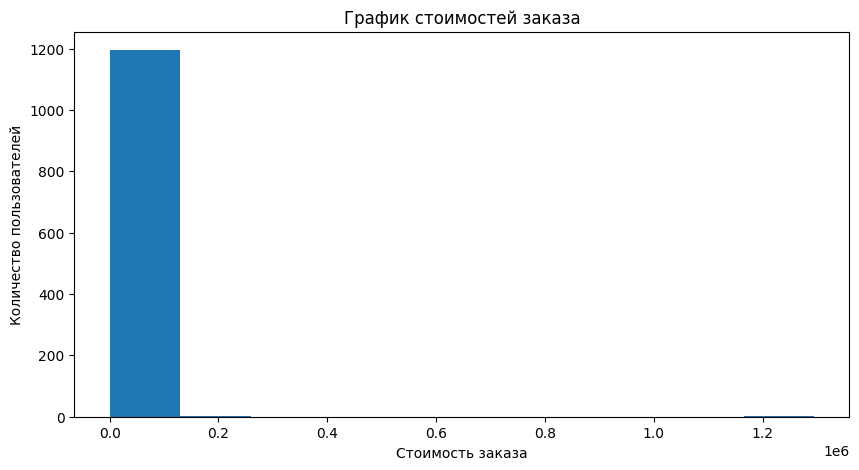

In [22]:
plt.figure(figsize=(10,5))
plt.hist(orders['revenue'])
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество пользователей')
plt.title('График стоимостей заказа');

No outliers are visible on this graph, so let's look at another one.

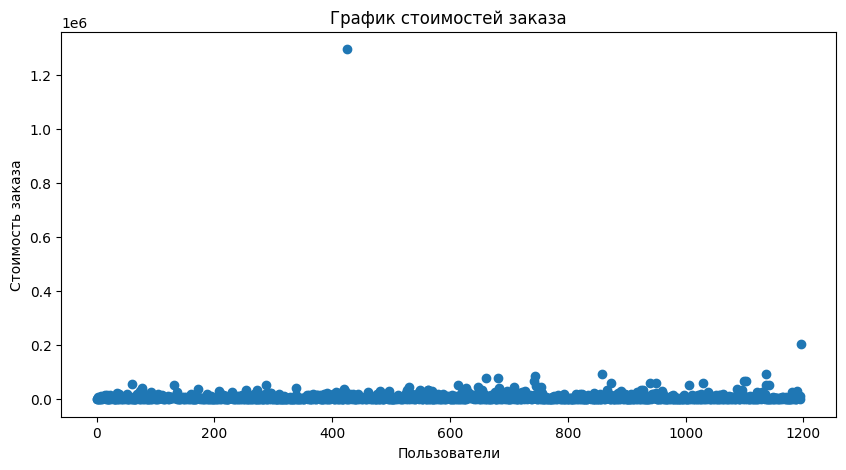

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.title('График стоимостей заказа');



We can see that most of the orders are in approximately the same price range. We can only observe 2 outliers, one of which is significantly different from the others. It is likely that this outlier is affecting the niche of the graph.

### 95th and 99th percentiles of order prices

Let's plot the 95th and 99th percentiles of order prices. We will choose a threshold to identify anomalous orders.

Let's determine the 90th, 95th, and 99th percentiles of the average check in the sample:

In [24]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])



Now we can see that more than 5% of orders have a price higher than 28000. And only 1% have a price of 58233, which is definitely an outlier. It would be reasonable to set the upper limit at 28000.

### Statistical significance of differences in the average number of orders per visitor between groups based on "raw" data


Let's calculate the statistical significance of the differences in the average number of orders per user based on "raw" data - without removing anomalous users. Let's formulate hypotheses.

Null: there is no difference in the average between the groups.

Alternative: there are differences in the average between the groups.

Let's set the critical level of statistical significance to alpha = 0.05.

We will use the Wilcoxon-Mann-Whitney test for the analysis.

In [25]:
# подготовим данные

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Let's calculate the statistical significance of the difference in the average number of orders between groups.



In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Let's create a pd.Series object of the required length:

In [27]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

Let's create a list of indexes:

In [28]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
 5      1
 6      1
 7      1
 8      1
 9      1
 10     1
 11     1
 12     1
 13     1
 14     1
 15     1
 16     1
 17     1
 18     4
 19     1
 20     1
 21     1
 22     1
 23     4
 24     1
 25     1
 26     1
 27     1
 28     1
 29     1
 30     1
 31     1
 32     1
 33     1
 34     1
 35     1
 36     1
 37     1
 38     1
 39     1
 40     1
 41     1
 42     2
 43     1
 44     1
 45     1
 46     1
 47     1
 48     1
 49     1
 50     1
 51     1
 52     1
 53     1
 54     1
 55     1
 56     1
 57     1
 58     1
 59     1
 60     1
 61     1
 62     1
 63     1
 64     1
 65     1
 66     1
 67     1
 68     3
 69     1
 70     1
 71     1
 72     1
 73     1
 74     2
 75     1
 76     1
 77     1
 78     1
 79     1
 80     1
 81     1
 82     2
 83     1
 84     1
 85     1
 86     1
 87     1
 88     1
 89     1
 90     1
 91     1
 92     1
 93     1
 94     1
 95     1
 96     1
 97     1
 98     1
 99     1


Let's combine the lists:

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [30]:
print("alpha =",0.05)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего количества заказов =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


alpha = 0.05
p-value = 0.017
Относительный прирост среднего количества заказов = 0.138




The first number - p-value = 0.017 is less than 0.05. Therefore, we reject the null hypothesis that there are no statistically significant differences in the average number of orders between the groups. The analysis of "raw" data showed that there are statistically significant differences in the average number of orders between the groups. The relative increase in the conversion rate of group B compared to group A is 13.8%.

### Statistical significance of differences in the average order value between groups based on "raw" data


Let's calculate the statistical significance of differences in the average order value between groups based on "raw" data. Draw conclusions and make assumptions.

In [31]:
print("alpha =",0.05)
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B к группе А =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value 0.729
Относительный прирост среднего чека группы B к группе А = 0.259




The p-value is greater than 0.05. This means that there is no reason to reject the null hypothesis and assume that there are differences in the average order value. This means that the average order value of group B is equal to the average order value of group A (or does not differ). Let's move on to analyzing anomalies.

### Statistical significance of differences in the average number of orders per visitor between groups based on "clean" data


Let's calculate the statistical significance of differences in the average number of orders per visitor between groups based on "clean" data. Draw conclusions and make assumptions.

Let's find out how many anomalous users there are in total.


In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

74


A total of 74 anomalous users.

Let's find out how their actions affected the test results. Let's calculate the statistical significance of differences in the average number of orders between test groups based on "clean" data. First, let's prepare samples of the number of orders per users per test groups:

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Let's apply the Mann-Whitney statistical criterion to the obtained samples:

In [34]:
print("alpha =",0.05)
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего количества заказов =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.013
Относительный прирост среднего количества заказов = 0.173


The results have hardly changed. The p-value is still less than 0.05. This means that we reject the null hypothesis that there are no statistically significant differences in conversion between groups. And the relative gain of group "B" over "A" is 17.4% (previously it was 13.9%)

### Statistical significance of differences in the average order value between groups based on "clean" data


Let's calculate the statistical significance of differences in the average order value between groups based on "clean" data. Draw conclusions and make assumptions.

In [35]:
print("alpha =",0.05)
print('p-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека =',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.738
Относительный прирост среднего чека = -0.020




Here, the p-value has hardly changed after cleaning the data. This means that there are no statistically significant differences between groups and there is no reason to reject the null hypothesis. In both cases, the value is above 0.05. The average order values in the groups are equal. However, the difference between the segments has decreased by 23.9% due to anomalous values.


### Conclusion on the test results


After analyzing the A/B test, we can draw several conclusions:

- There is a statistically significant difference in the average number of orders between groups based on "raw" and "clean" data. The p-value is less than 0.05.
- There is no statistically significant difference in the average order value between groups based on "raw" and "clean" data. The p-value is practically the same and greater than 0.05.
- The relative gain in the average number of orders of group "B" over "A" is 17.4% (compared to 13.9% based on "raw" data).
- The average order value of group B is equal to the average order value of group A.
- The chart of the difference in the average number of orders between groups shows that the results of group B are better than those of group A.
- The chart of the difference in the average order value shows that the results of group A are not significantly different from those of group B.